<a href="https://colab.research.google.com/github/maria0041/Skin-Cancer-detection/blob/main/Skin_Cancer_Code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

print('Data source import complete.')

Mounted at /content/drive/
Data source import complete.


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive (1).zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
print(tf.__version__)
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2.17.1


In [ ]:
data_path = '/content/dataset'

def load_data(dataset_path):
    images = []
    labels = []
    for label, category in enumerate(['benign', 'malignant']):
        category_path = os.path.join(dataset_path, 'train', category)
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

In [ ]:
train_images, train_labels = load_data(data_path)

test_images, test_labels = load_data(data_path.replace('train', 'test'))

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,test_size=0.2, random_state=42)
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (2109, 150, 150, 3)
Train labels shape: (2109,)
Validation images shape: (528, 150, 150, 3)
Validation labels shape: (528,)
Test images shape: (2637, 150, 150, 3)
Test labels shape: (2637,)


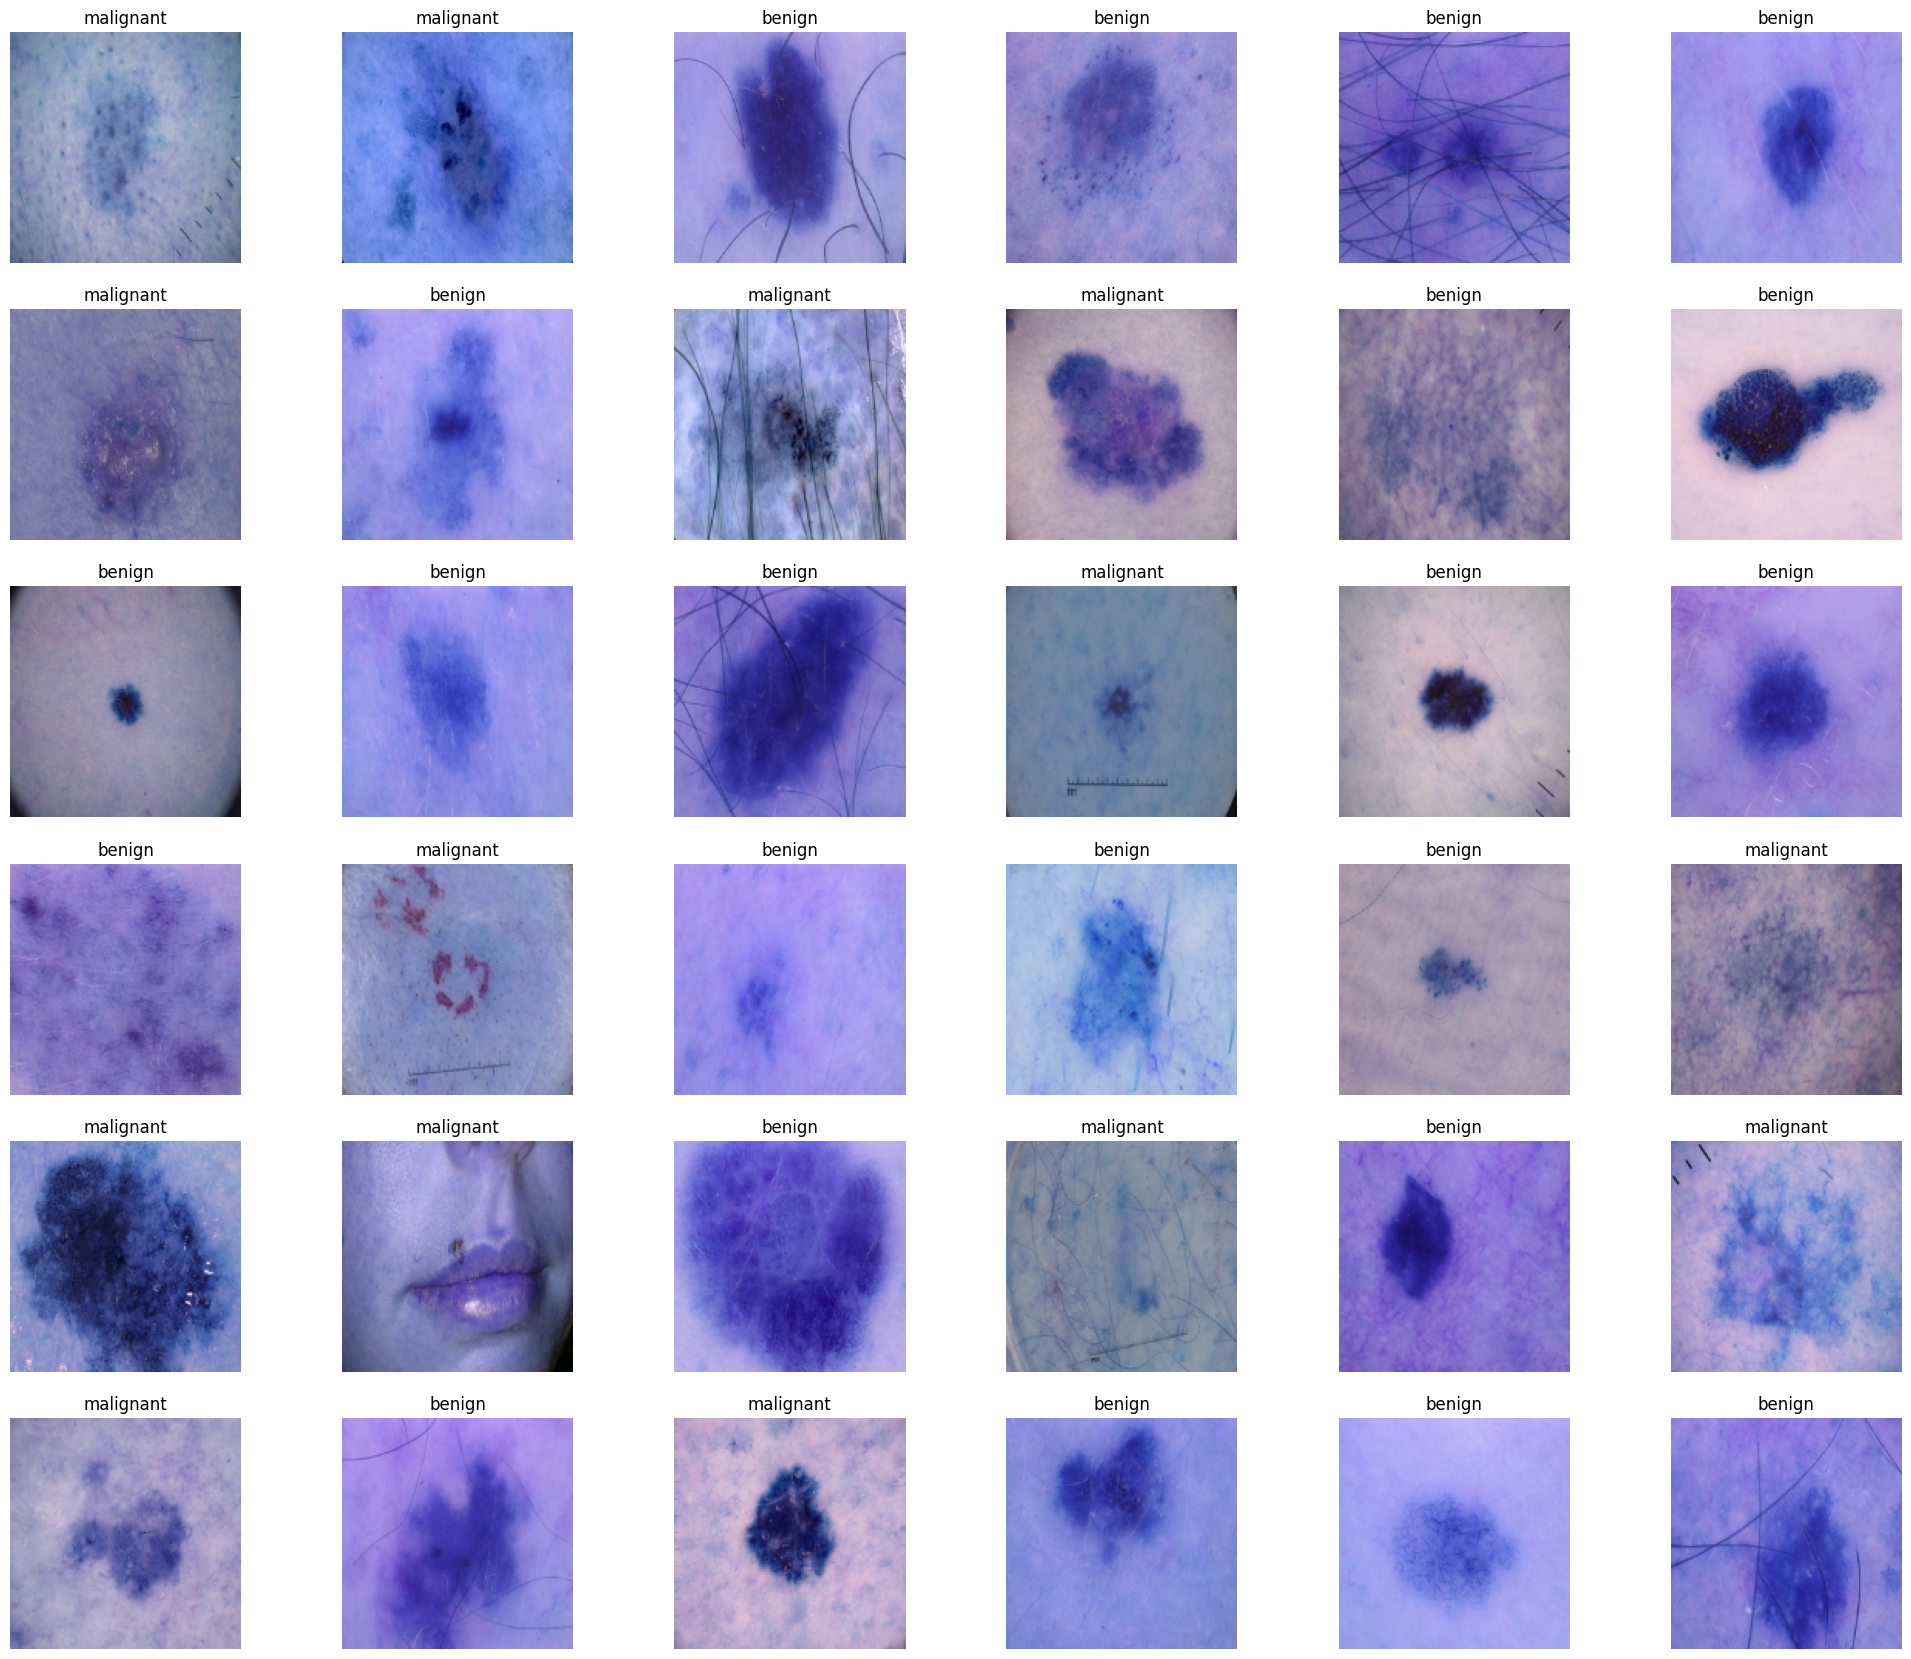

In [ ]:
plt.figure(figsize=(25,21))
for i in range(36):
    plt.subplot(6,6, i+1)
    plt.imshow(train_images[i])
    if train_labels[i] == 0:
        plt.title("benign")
    else:
        plt.title("malignant")
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,618,177 (9.99 MB)

 Trainable params: 2,618,177 (9.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,             # Rotate images by up to 40 degrees
    width_shift_range=0.3,         # Shift width by 30%
    height_shift_range=0.3,        # Shift height by 30%
    shear_range=0.3,               # Apply shear transformation
    zoom_range=0.3,                # Zoom in and out by 30%
    horizontal_flip=True,          # Flip images horizontally
    vertical_flip=True,            # Flip images vertically
    fill_mode='nearest',           # Fill missing pixels with nearest ones
    brightness_range=[0.8, 1.2],   # Randomly adjust brightness between 0.8 and 1.2
    channel_shift_range=50.0,      # Randomly shift color channels (e.g., RGB)
    contrast_range=[0.8, 1.2],     # Randomly adjust contrast
)

# Apply augmentation on the training data
datagen.fit(train_images)


In [ ]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=90,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping])


Epoch 1/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.8368 - loss: 0.3609 - val_accuracy: 0.8182 - val_loss: 0.3605
Epoch 2/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.8254 - loss: 0.3657 - val_accuracy: 0.8428 - val_loss: 0.3137
Epoch 3/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.8415 - loss: 0.3451 - val_accuracy: 0.8333 - val_loss: 0.3436
Epoch 4/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.8396 - loss: 0.3417 - val_accuracy: 0.8523 - val_loss: 0.3114
Epoch 5/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.8163 - loss: 0.3679 - val_accuracy: 0.8466 - val_loss: 0.3331
Epoch 6/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.8236 - loss: 0.3647 - val_accuracy: 0.8409 - val_loss: 0.3338
Epoch 7/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.8550 - loss: 0.3247 - val_accuracy: 0.8352 - val_loss: 0.3164
Epoch 8/90
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.8472 - loss: 0.3416 - val_accu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_images)

y_pred_classes = (y_pred > 0.5).astype("int32")

print("Classification Report:\n")
print(classification_report(test_labels, y_pred_classes))

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1440
           1       0.83      0.90      0.86      1197

    accuracy                           0.87      2637
   macro avg       0.87      0.87      0.87      2637
weighted avg       0.87      0.87      0.87      2637



In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8442 - loss: 0.2927
Test Accuracy: 87.14%
Test Loss: 0.2920


<Axes: >

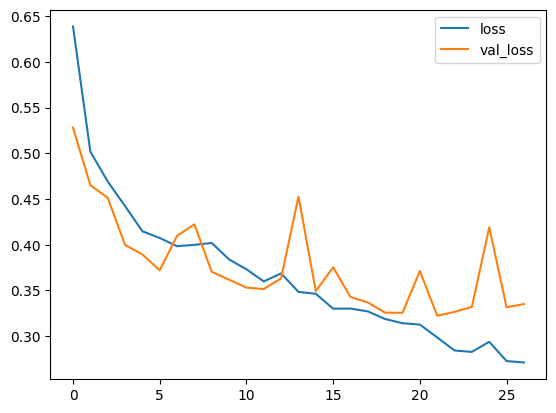

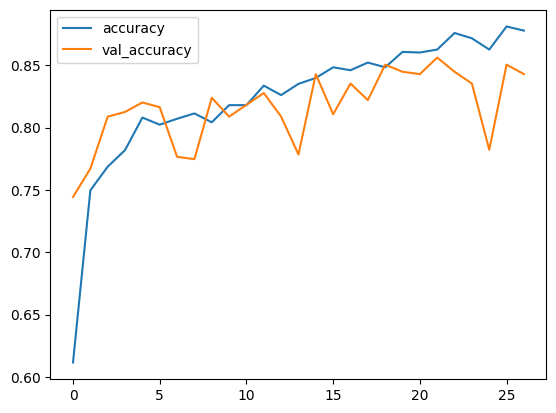

In [ ]:
import pandas as pd
ef=pd.DataFrame(history.history)
ef[['loss','val_loss']].plot()
ef[['accuracy','val_accuracy']].plot()

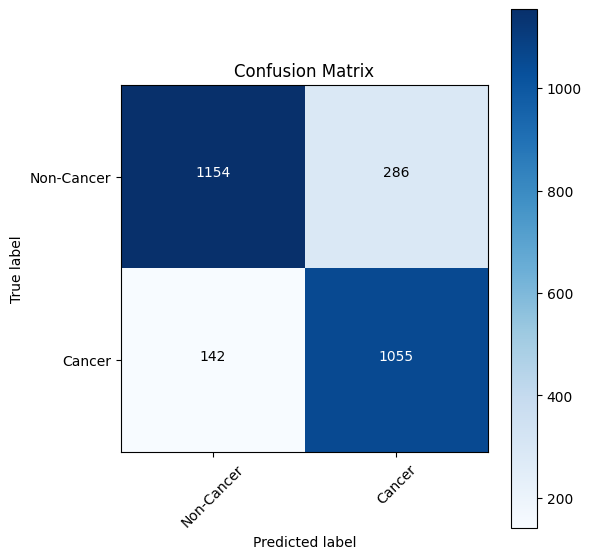

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Create the confusion matrix manually
cm = np.array([[1154, 286],
               [142, 1055]])

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Cancer', 'Cancer'], rotation=45)
plt.yticks(tick_marks, ['Non-Cancer', 'Cancer'])

# Add numbers to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

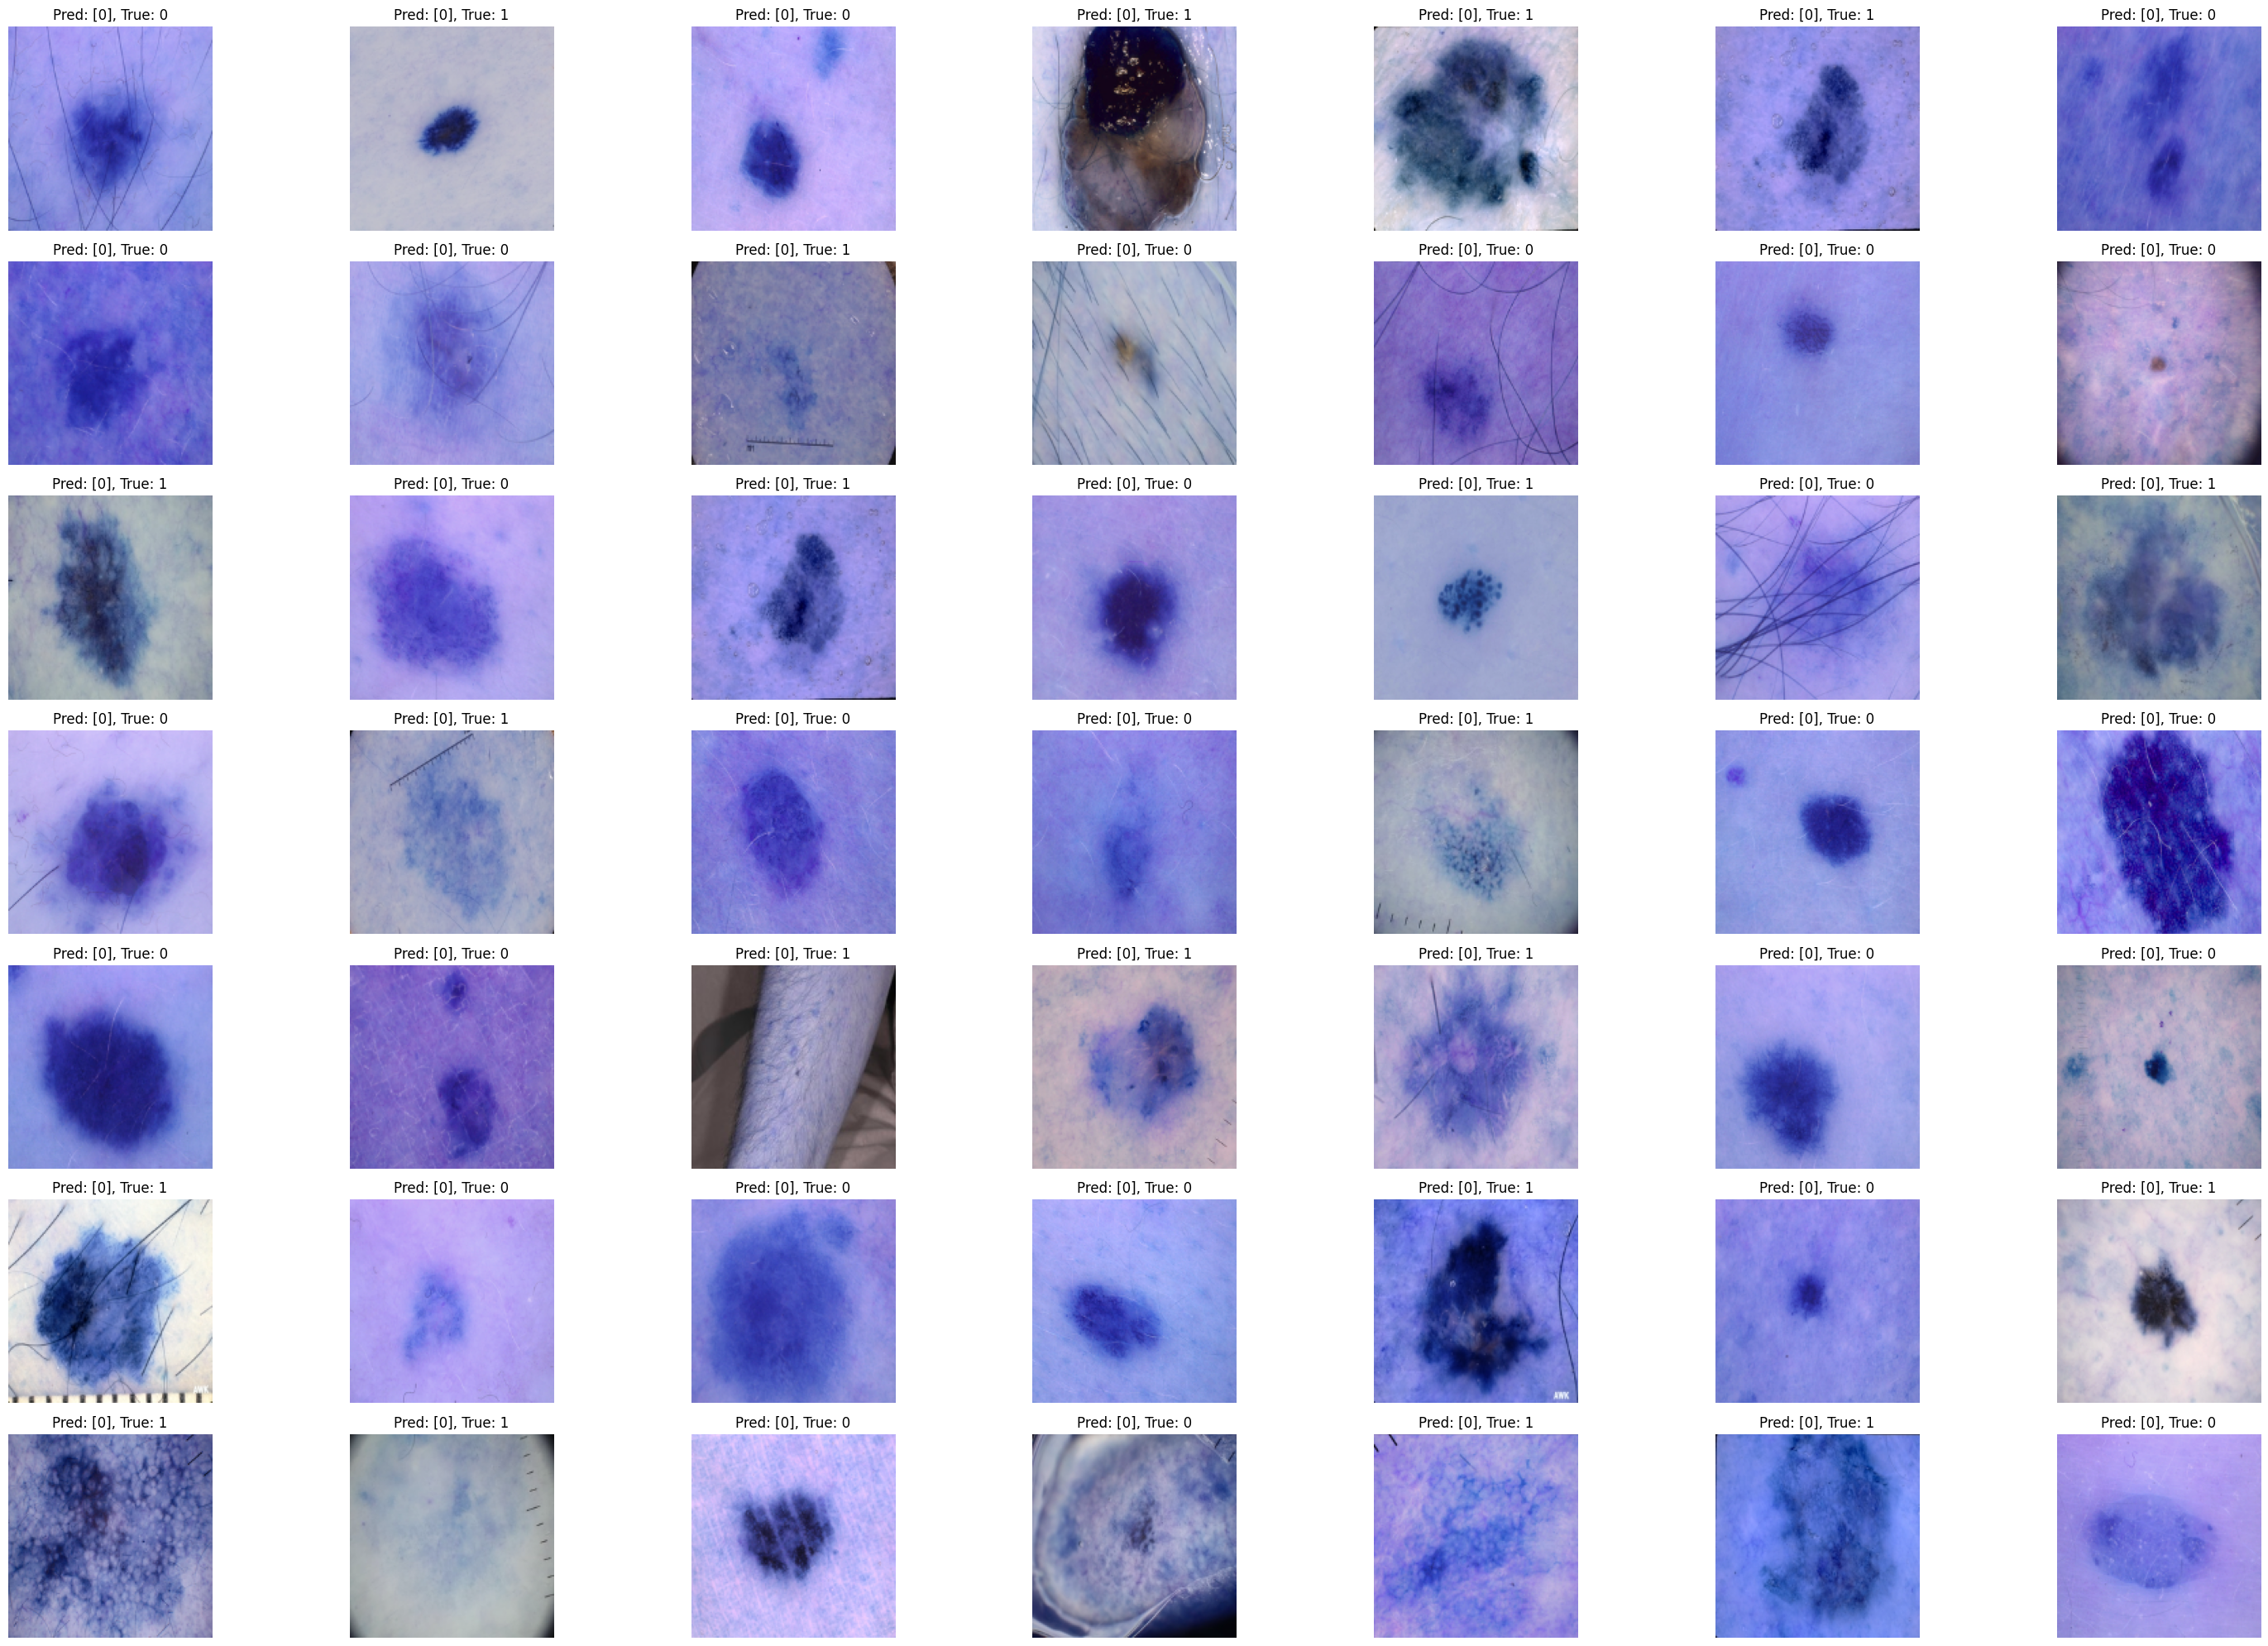

In [ ]:
plt.figure(figsize=(30,20))
indices = np.random.choice(len(test_images),49)

for i, idx in enumerate(indices):
    plt.subplot(7, 7, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title(f"Pred: {y_pred_classes[idx]}, True: {test_labels[idx]}")

plt.tight_layout()
plt.show()

In [ ]:
!pip install pydot graphviz

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def create_flowchart():
    G = nx.DiGraph()
    G.add_edges_from([
        ("Start", "Data Preparation"),
        ("Data Preparation", "Data Import"),
        ("Data Preparation", "Data Extraction"),
        ("Data Preparation", "Data Resizing"),
        ("Data Preparation", "Data Normalization"),
        ("Data Preparation", "Data Splitting"),
        ("Data Splitting", "Split Data"),
        ("Data Splitting", "Split Labels"),
        ("Data Splitting", "Model Architecture"),
        ("Model Architecture", "Define CNN"),
        ("Model Architecture", "Model Compilation"),
        ("Model Architecture", "Model Training"),
        ("Model Training", "Train Model"),
        ("Model Training", "Evaluate Model"),
        ("Model Training", "Model Testing"),
        ("Model Testing", "Test Model"),
        ("Model Testing", "Evaluate Results"),
        ("Model Testing", "Visualization"),
        ("Visualization", "Confusion Matrix"),
        ("Visualization", "Classification Report"),
        ("Visualization", "Accuracy Plot"),
        ("Visualization", "Loss Plot"),
        ("Visualization", "End")
    ])

    pos = nx.spring_layout(G, k=1, iterations=50)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, font_size=8, font_weight='bold',
            arrows=True, edge_color='gray')

    nx.draw_networkx_labels(G, pos, {node: node for node in G.nodes()})

    plt.title("Structured Methodology Flow Chart", fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Save as EPS file
    plt.savefig('methodology_flowchart.eps', format='eps', dpi=300)
    plt.close()

create_flowchart()
print("Flow chart saved as 'methodology_flowchart.eps'")

Flow chart saved as 'methodology_flowchart.eps'


In [ ]:
model.save("skin.keras")